In [76]:
import pandas as pd

In [77]:
# now we can use the normalized weights to calculate the liveability score for each suburb

data = pd.read_csv('../data/curated/Processed Data Final.csv')

In [78]:
# lower case all columns
data.columns = map(str.lower, data.columns)

# replace spaces with underscores in column names
data.columns = data.columns.str.replace(' ', '_')


In [79]:
data2024 = data[data['year'] == 2024]

In [80]:
data2024.columns

Index(['distance_to_cbd', 'time_to_cbd', 'distance_to_station',
       'time_to_station', 'year', 'average_household_size',
       'average_num_psns_per_bedroom', 'median_age_persons', 'tot_p_p',
       'average_quarterly_count', 'sal_code', 'median_score', 'average_price',
       'proximity_to_beach', 'airbnb_count', 'commercial_density',
       'education_density', 'food_establishments_density',
       'healthcare_density', 'industrial_density', 'public_transport_density',
       'recreation_density', 'residential_density', 'shopping_density',
       'pop_density', 'interest_rate', 'median_tot_fam_inc_weekly/inflation',
       'median_tot_hhd_inc_weekly/inflation',
       'median_tot_prsnl_inc_weekly/inflation', 'gdp_cbd/inflation/beach',
       'gdp_cbd/inflation/cbd', 'gpd/inflation/airbnb',
       'average_weekly_rent/inflation/household_size',
       'a_crimes_against_the_person/per_person',
       'b_property_and_deception_offences/per_person',
       'c_drug_offences/per_person

In [81]:
import pandas as pd

# Current list of variables
variables = [
    'distance_to_cbd', 'time_to_cbd', 'distance_to_station',
    'time_to_station', 'year', 'average_household_size',
    'average_num_psns_per_bedroom', 'median_age_persons', 'tot_p_p',
    'sal_code', 'median_score', 'average_price',
    'proximity_to_beach', 'airbnb_count', 'commercial_density',
    'education_density', 'food_establishments_density',
    'healthcare_density', 'industrial_density', 'public_transport_density',
    'recreation_density', 'residential_density', 'shopping_density',
    'pop_density', 'interest_rate', 'median_tot_fam_inc_weekly/inflation',
    'median_tot_hhd_inc_weekly/inflation',
    'median_tot_prsnl_inc_weekly/inflation', 'gdp_cbd/inflation/beach',
    'gdp_cbd/inflation/cbd', 'gpd/inflation/airbnb',
    'average_weekly_rent/inflation/household_size',
    'a_crimes_against_the_person/per_person',
    'b_property_and_deception_offences/per_person',
    'c_drug_offences/per_person',
    'd_public_order_and_security_offences/per_person',
    'e_justice_procedures_offences/per_person',
    'f_other_offences/per_person'
]

# Existing coefficients_dict with base variables
coefficients_dict = {
    'distance_to_cbd': 0,
    'time_to_cbd': -0.6,
    'distance_to_station': 0,
    'time_to_station': -0.5,
    'cemeteries': -0.2,
    'civic_squares_and_promenades': 0.1,
    'conservation_reserves': 0.1,
    'government_schools': 0.2,
    'natural_and_semi-natural_open_space': 0.2,
    'non-government_schools': 0.2,
    'parks_and_gardens': 0.3,
    'public_housing_reserves': -0.8,
    'recreation_corridor': 0.2,
    'services_and_utilities_reserves': 0.3,
    'sportsfields_and_organised_recreation': 0.4,
    'tertiary_institutions': 0.3,
    'transport_reservations': -0.2,
    'year': 0.0,
    'average_household_size': 0.1,
    'average_num_psns_per_bedroom': -0.1,
    'median_age_persons': 0.0,
    'tot_p_p': 0.0,
    'average_quarterly_count': 0.0,
    'commercial': 0.5,
    'education': 0.1,
    'food_establishments': 0.1,
    'healthcare': 0.4,
    'industrial': -1.5,
    'public_transport': 0.1,
    'recreation': 0.3,
    'residential': 0.2,
    'shopping': 0.3,
    'sal_code': 0.0,
    'median_score': 0.9,
    'average_price': 0.3,
    'proximity_to_beach': -0.8,
    'interest_rate': 0.0,
    'median_tot_fam_inc_weekly/inflation': 0.7,
    'median_tot_hhd_inc_weekly/inflation': 0.7,
    'median_tot_prsnl_inc_weekly/inflation': 0.7,
    'gdp_cbd/inflation/beach': -0.2,
    'a_crimes_against_the_person/per_person': -2,
    'b_property_and_deception_offences/per_person': -1,
    'c_drug_offences/per_person': -1.8,
    'd_public_order_and_security_offences/per_person': -0.6,
    'e_justice_procedures_offences/per_person': -0.7,
    'f_other_offences/per_person': -0.6
}

# Initialize a new dictionary for the current variables with adjusted coefficients
new_coefficients_dict = {}

for var in variables:
    if var.endswith('_density'):
        # Extract the base variable name
        base_var = var[:-8]  # Removes '_density'
        # Assign the coefficient of the base variable if it exists
        coeff = coefficients_dict.get(base_var, 0)
        new_coefficients_dict[var] = coeff
    else:
        # Assign the coefficient directly if it exists
        coeff = coefficients_dict.get(var, 0)
        new_coefficients_dict[var] = coeff

# Display the new coefficients mapping
print("New Coefficients Mapping:")
for var, coeff in new_coefficients_dict.items():
    print(f"{var}: {coeff}")


New Coefficients Mapping:
distance_to_cbd: 0
time_to_cbd: -0.6
distance_to_station: 0
time_to_station: -0.5
year: 0.0
average_household_size: 0.1
average_num_psns_per_bedroom: -0.1
median_age_persons: 0.0
tot_p_p: 0.0
sal_code: 0.0
median_score: 0.9
average_price: 0.3
proximity_to_beach: -0.8
airbnb_count: 0
commercial_density: 0.5
education_density: 0.1
food_establishments_density: 0.1
healthcare_density: 0.4
industrial_density: -1.5
public_transport_density: 0.1
recreation_density: 0.3
residential_density: 0.2
shopping_density: 0.3
pop_density: 0
interest_rate: 0.0
median_tot_fam_inc_weekly/inflation: 0.7
median_tot_hhd_inc_weekly/inflation: 0.7
median_tot_prsnl_inc_weekly/inflation: 0.7
gdp_cbd/inflation/beach: -0.2
gdp_cbd/inflation/cbd: 0
gpd/inflation/airbnb: 0
average_weekly_rent/inflation/household_size: 0
a_crimes_against_the_person/per_person: -2
b_property_and_deception_offences/per_person: -1
c_drug_offences/per_person: -1.8
d_public_order_and_security_offences/per_person: 

In [82]:
from sklearn.preprocessing import StandardScaler

# standardise the data
# Exclude 'sal_code' from standardization
columns_to_standardize = [col for col in variables if col != 'sal_code']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
data2024[columns_to_standardize] = scaler.fit_transform(data2024[columns_to_standardize])

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/3497166929.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2024[columns_to_standardize] = scaler.fit_transform(data2024[columns_to_standardize])


In [83]:
# weight the features
data2024['liveability_score'] = 0

for i in (new_coefficients_dict.keys()):
    data2024['liveability_score'] += new_coefficients_dict[i] * data2024[i]
# group suburb by sal_code and calculate the mean liveability score
suburbs = data2024.groupby('sal_code').mean()

suburbs.reset_index(inplace=True)
    

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/445044307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2024['liveability_score'] = 0
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/445044307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2024['liveability_score'] += new_coefficients_dict[i] * data2024[i]


In [84]:
# merge with shapefile find name

import geopandas as gpd
SAL = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

In [85]:
# Filter out non-numeric values
SAL = SAL[SAL['SAL_CODE21'].apply(lambda x: x.isnumeric())]

# Ensure 'SAL_CODE21' is of type int in SAL GeoDataFrame
SAL['SAL_CODE21'] = SAL['SAL_CODE21'].astype(int)

# Merge top_ten with SAL GeoDataFrame on 'sal_code' and 'SAL_CODE21'
suburbs = SAL.merge(suburbs, left_on='SAL_CODE21', right_on='sal_code')


# Get top ten suburbs by liveability score
top_ten = suburbs.nlargest(20, 'liveability_score')
bottom_ten = suburbs.nsmallest(20, 'liveability_score')
print(top_ten[['sal_code', 'liveability_score']])

     sal_code  liveability_score
79      20468          14.773939
60      20337          13.177007
276     21677          12.863707
12      20066          12.730815
266     21629          12.727556
199     21152          12.672914
420     22547          12.233128
181     21010          12.088869
329     22016          11.981343
89      20523          11.308798
1       20003          11.236810
77      20453          10.956317
26      20123          10.775809
232     21336          10.571546
216     21246          10.337729
261     21586          10.295756
404     22399          10.132155
239     21365          10.110847
61      20338          10.086234
148     20864          10.076556


In [86]:
bottom_ten['liveability_score']

41    -39.830683
176   -36.753469
88    -36.055177
293   -32.793554
24    -30.366908
277   -27.376586
22    -24.691265
269   -23.669916
375   -23.650026
401   -23.082825
62    -21.957648
376   -21.603264
124   -21.437670
281   -19.924228
78    -19.422053
268   -19.353635
212   -18.541264
405   -18.155598
40    -17.055555
459   -16.784912
Name: liveability_score, dtype: float64

In [87]:
top_ten['liveability_score']

79     14.773939
60     13.177007
276    12.863707
12     12.730815
266    12.727556
199    12.672914
420    12.233128
181    12.088869
329    11.981343
89     11.308798
1      11.236810
77     10.956317
26     10.775809
232    10.571546
216    10.337729
261    10.295756
404    10.132155
239    10.110847
61     10.086234
148    10.076556
Name: liveability_score, dtype: float64

In [88]:
top_ten['SAL_NAME21']

79      Canterbury (Vic.)
60        Brighton (Vic.)
276    Middle Park (Vic.)
12        Armadale (Vic.)
266              McKinnon
199       Hawthorn (Vic.)
420                Toorak
181      Glen Iris (Vic.)
329                Ormond
89        Caulfield North
1              Aberfeldie
77      Camberwell (Vic.)
26                 Balwyn
232            Kew (Vic.)
216        Ivanhoe (Vic.)
261        Malvern (Vic.)
404          Surrey Hills
239            Kingsville
61          Brighton East
148           Elsternwick
Name: SAL_NAME21, dtype: object

In [89]:
bottom_ten['SAL_NAME21']

41                 Bendigo
176                Geelong
88          Caulfield East
293                Morwell
24        Ballarat Central
277                Mildura
22              Bairnsdale
269          Melton (Vic.)
375         Seymour (Vic.)
401        Sunshine (Vic.)
62     Broadmeadows (Vic.)
376             Shepparton
124              Dandenong
281                    Moe
78           Campbellfield
268              Melbourne
212                Horsham
405              Swan Hill
40                 Benalla
459                Wodonga
Name: SAL_NAME21, dtype: object

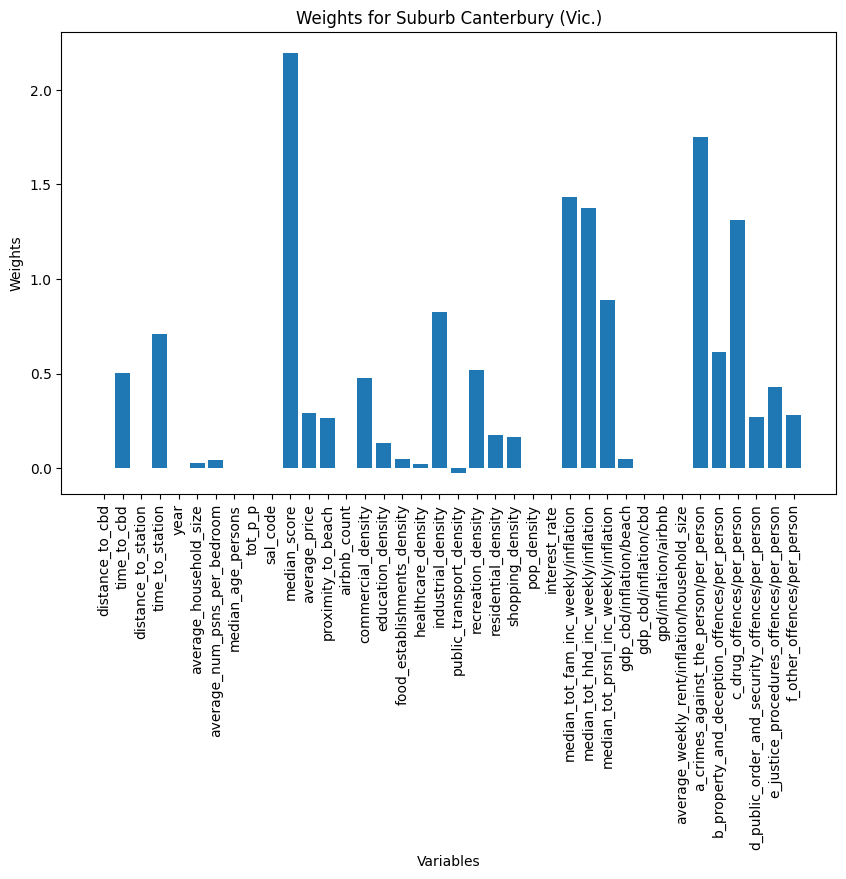

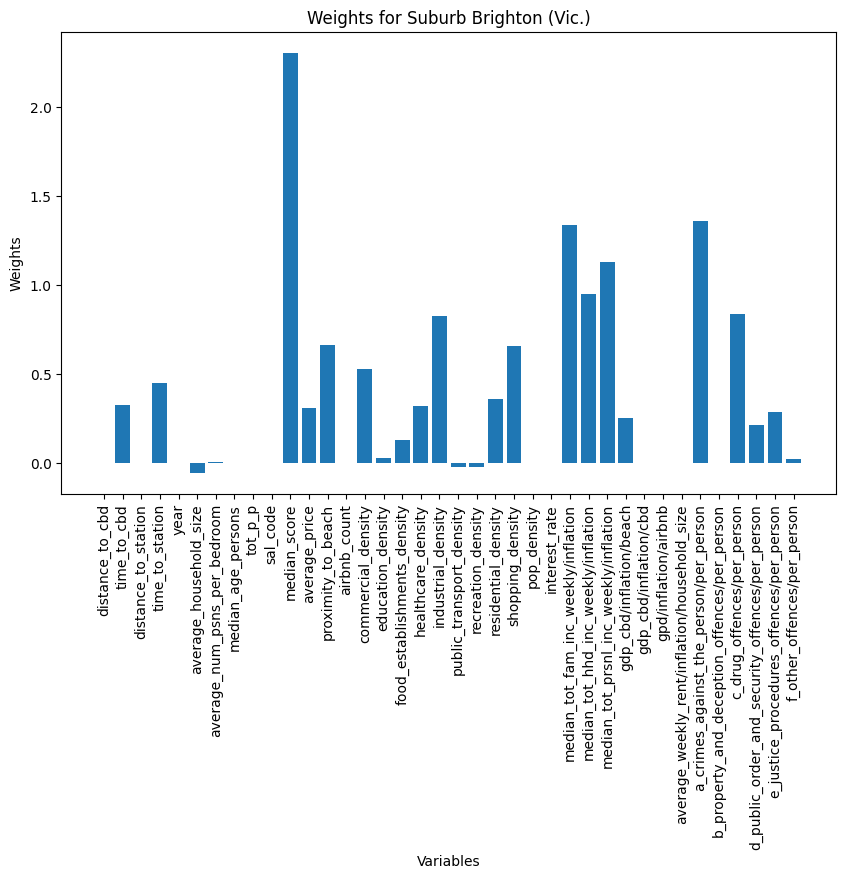

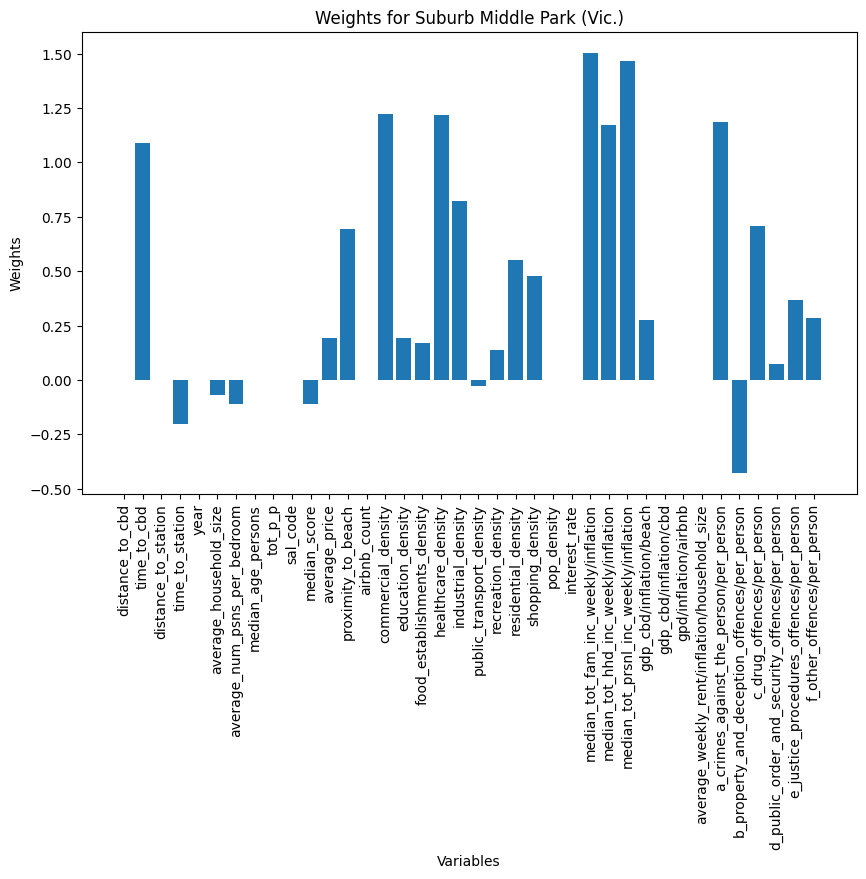

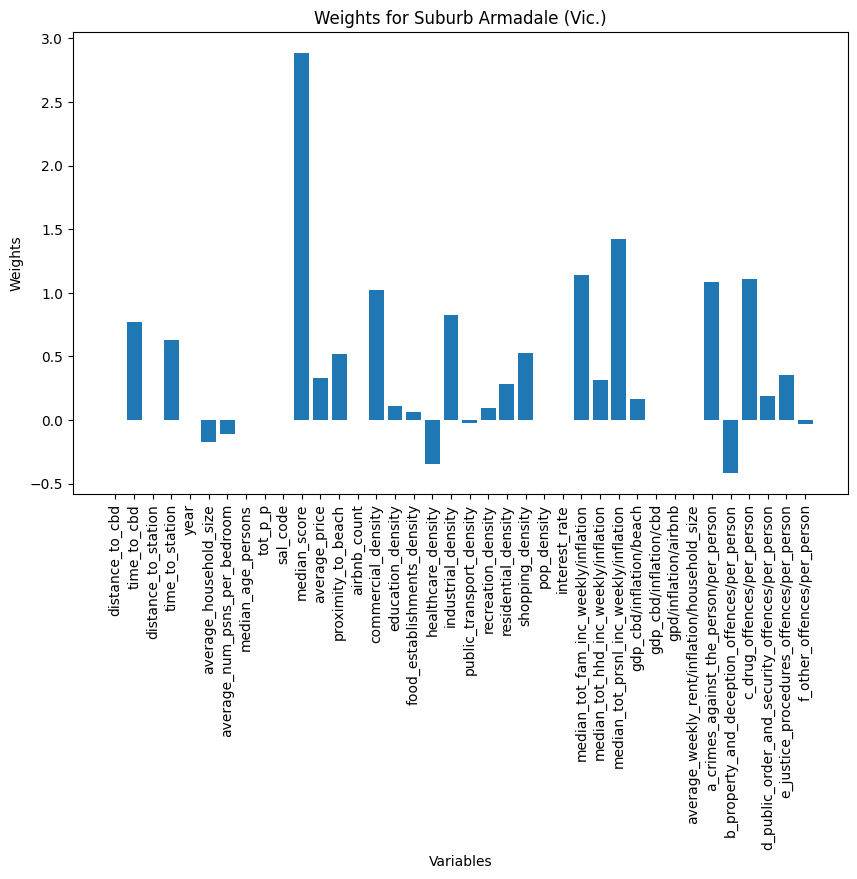

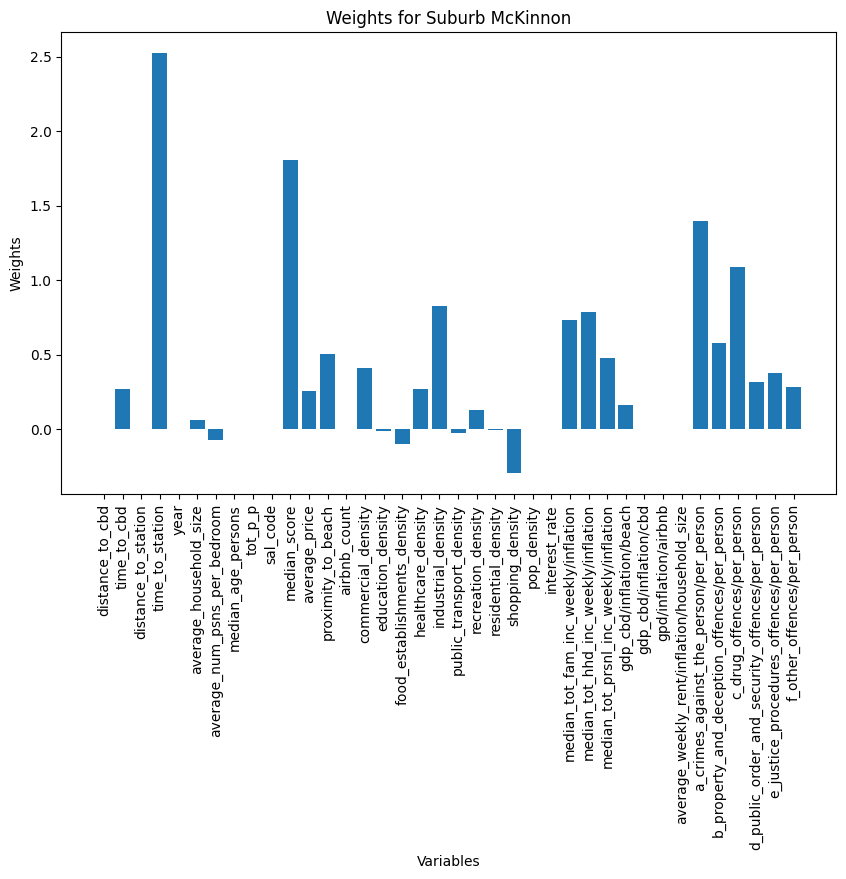

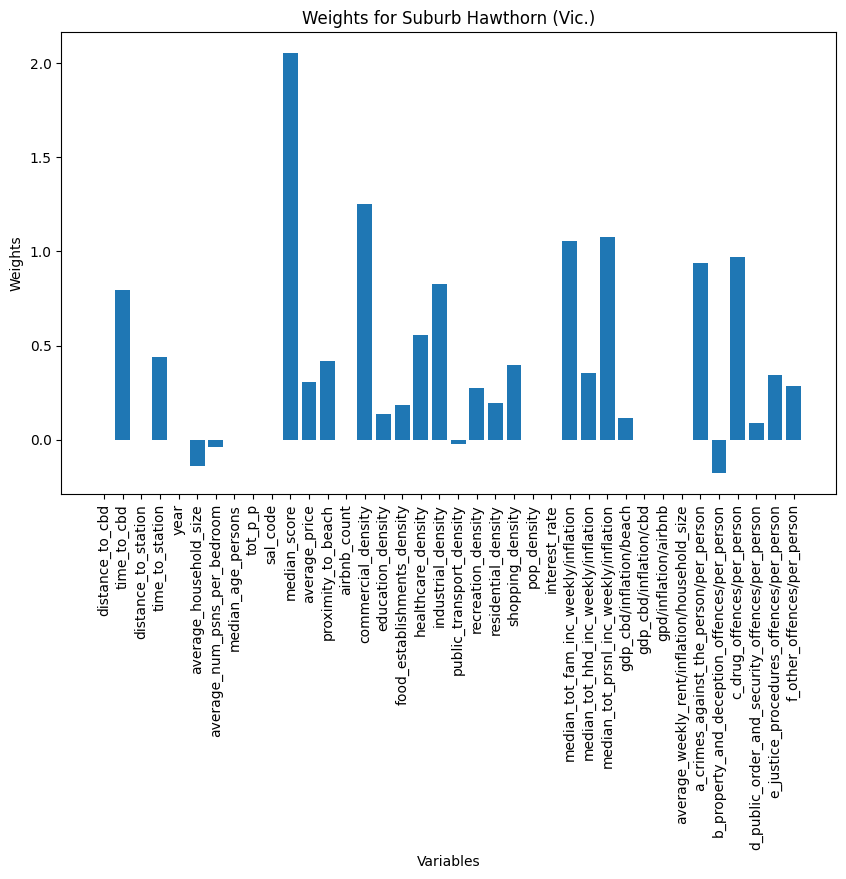

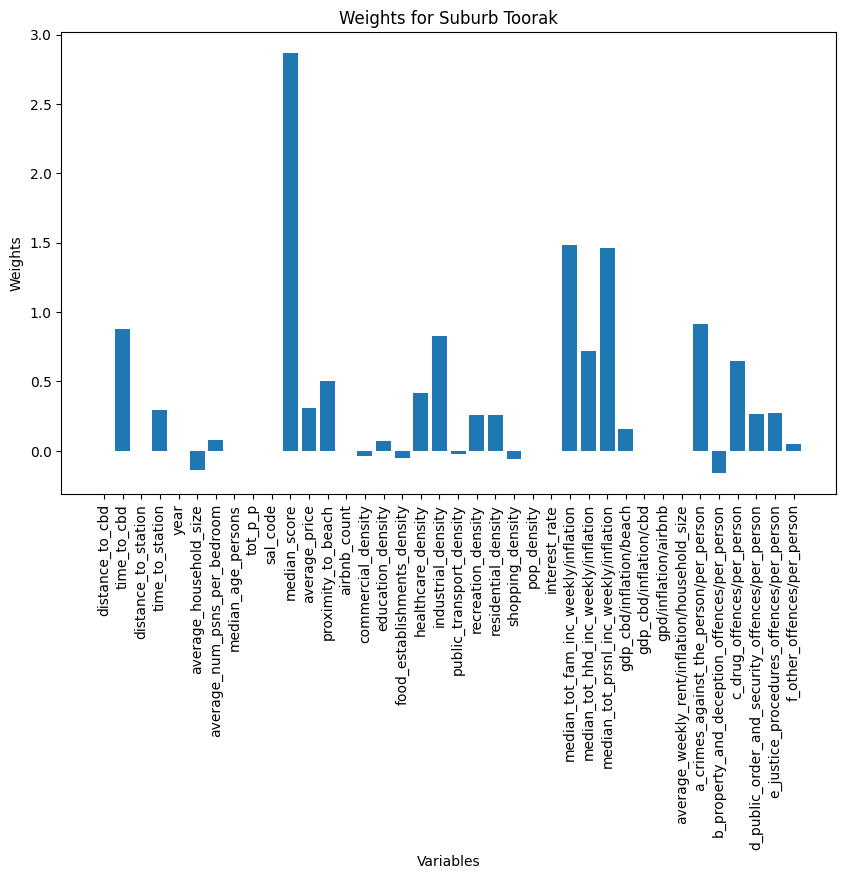

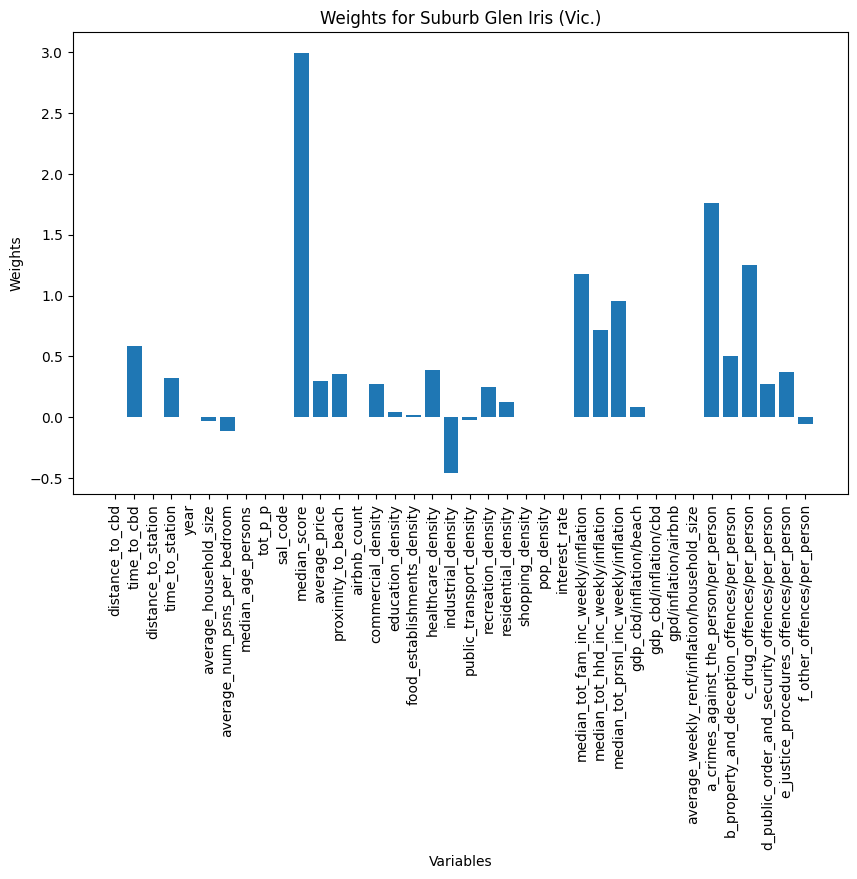

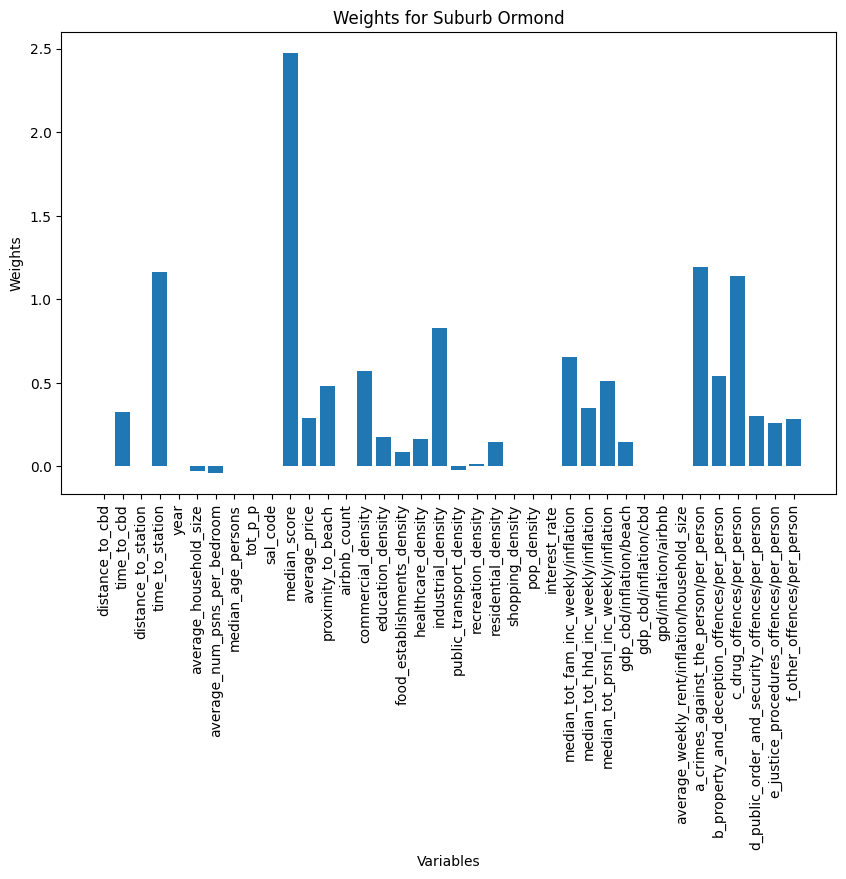

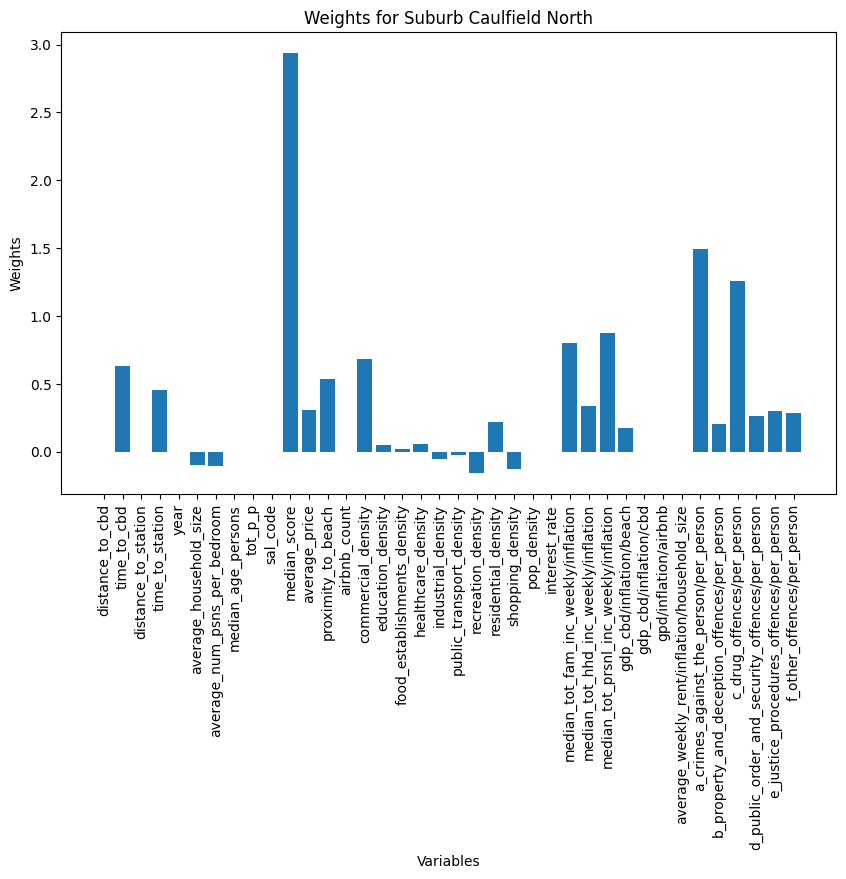

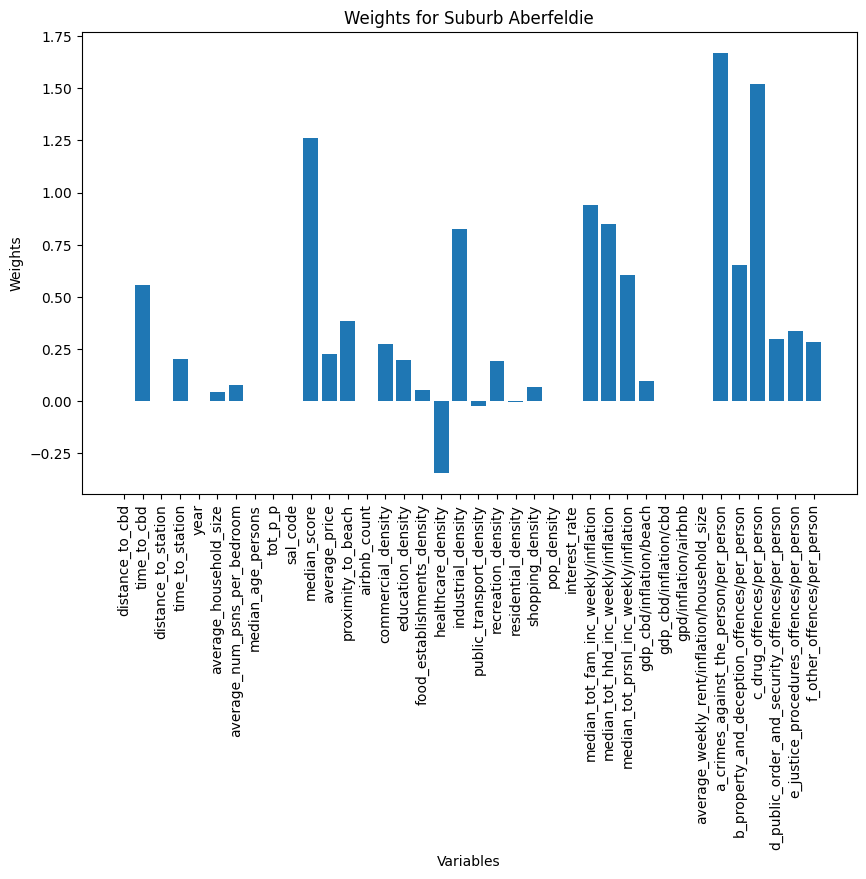

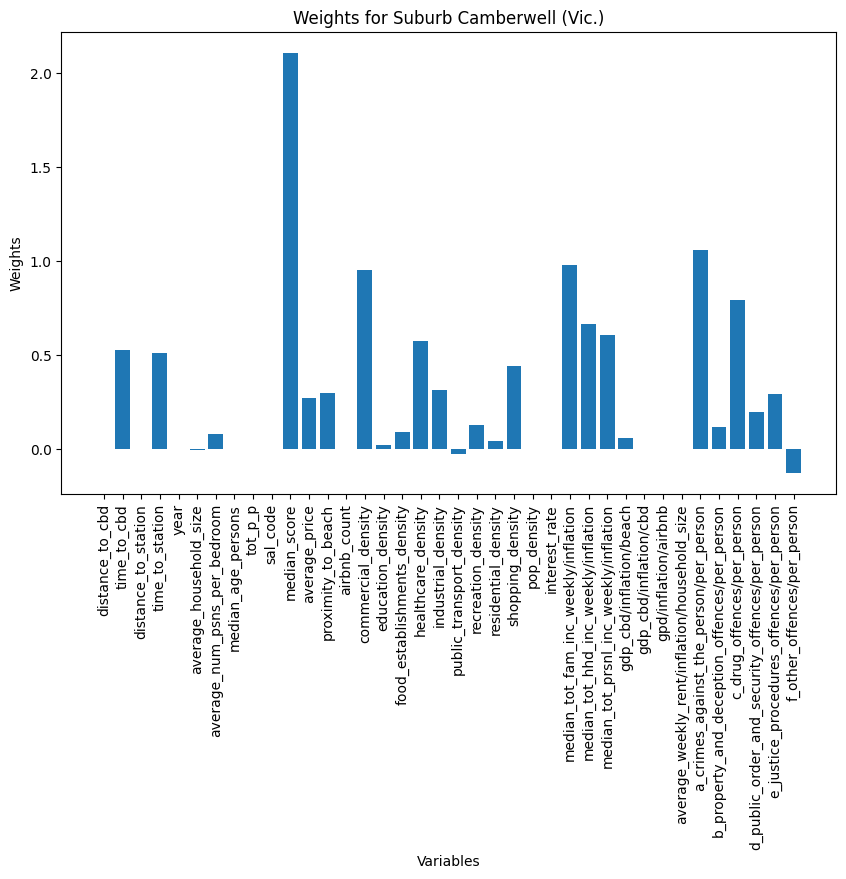

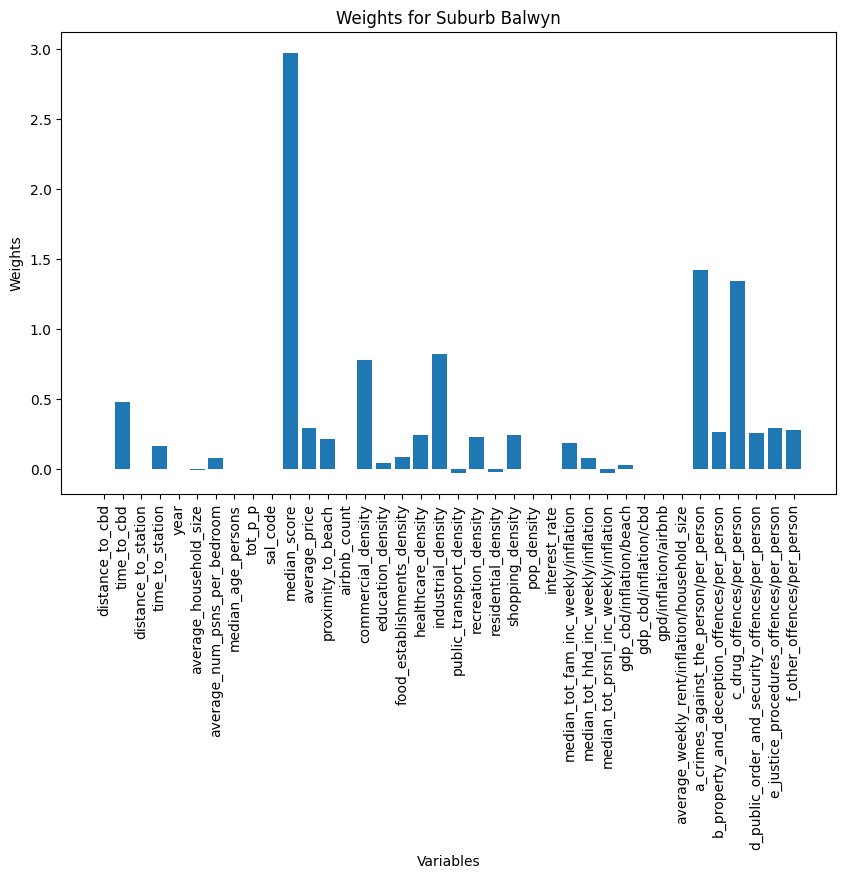

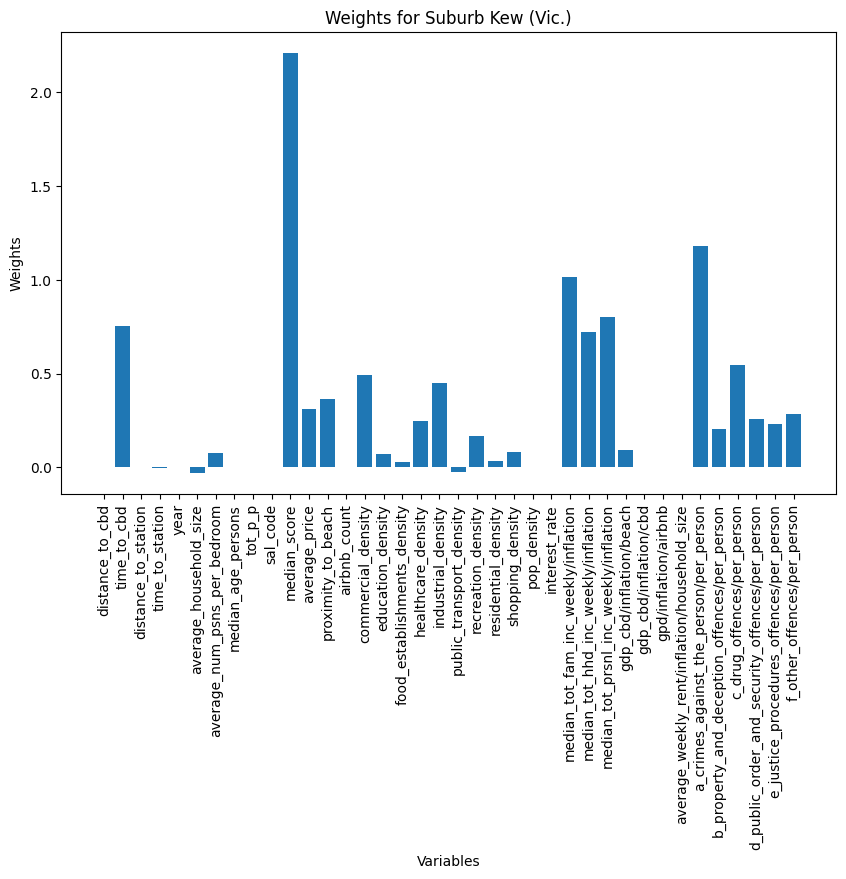

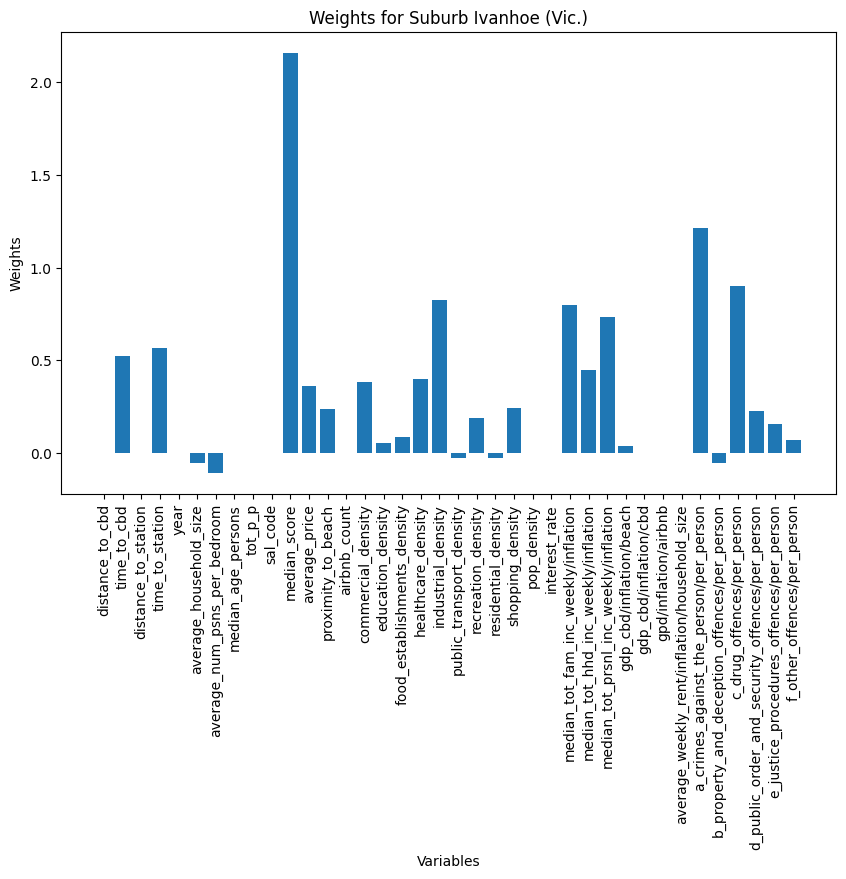

In [90]:
import os

# get weights for the top top_ten
# for every suburb in the top ten, get the weights for each feature
# and graph

# Create directory if it doesn't already exist
output_dir = '../plots/liveability/suburb_weights'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

import matplotlib.pyplot as plt

# Get the weights for the top ten suburbs
for index, row in list(top_ten.iterrows())[:15]:
    sal_code = row['SAL_NAME21']

    # Get the weights for the suburb
    weights = []

    for i in (new_coefficients_dict.keys()):
        weight = new_coefficients_dict[i] * row[i]
        weights.append(weight)
    
    # Plot the weights
    plt.figure(figsize=(10, 6))
    plt.bar(variables, weights)
    plt.xlabel('Variables')
    plt.ylabel('Weights')
    plt.title(f'Weights for Suburb {sal_code}')
    plt.xticks(rotation=90)

    # Save the plot
    plt.savefig(f'{output_dir}/weights_{sal_code}.png')
    plt.show()




In [91]:

# for better visualisaiton, remove suburbs too far outside melbourne
# Compute distance to Melbourne CBD
from math import sqrt
from math import asin, radians
from numpy import sin, cos


melbourne_cbd_coords = (-37.8136, 144.9631)  # Latitude and Longitude of Melbourne CBD

# Function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of earth in kilometers
    return c * r

# Apply the function to calculate distance to Melbourne CBD
suburbs['distance_to_CBD'] = suburbs.apply(lambda row: haversine(row['geometry'].centroid.y, row['geometry'].centroid.x, melbourne_cbd_coords[0], melbourne_cbd_coords[1]), axis=1)

# Filter out suburbs too far outside Melbourne (e.g., more than 50 km)
suburbs = suburbs[suburbs['distance_to_CBD'] <= 100]

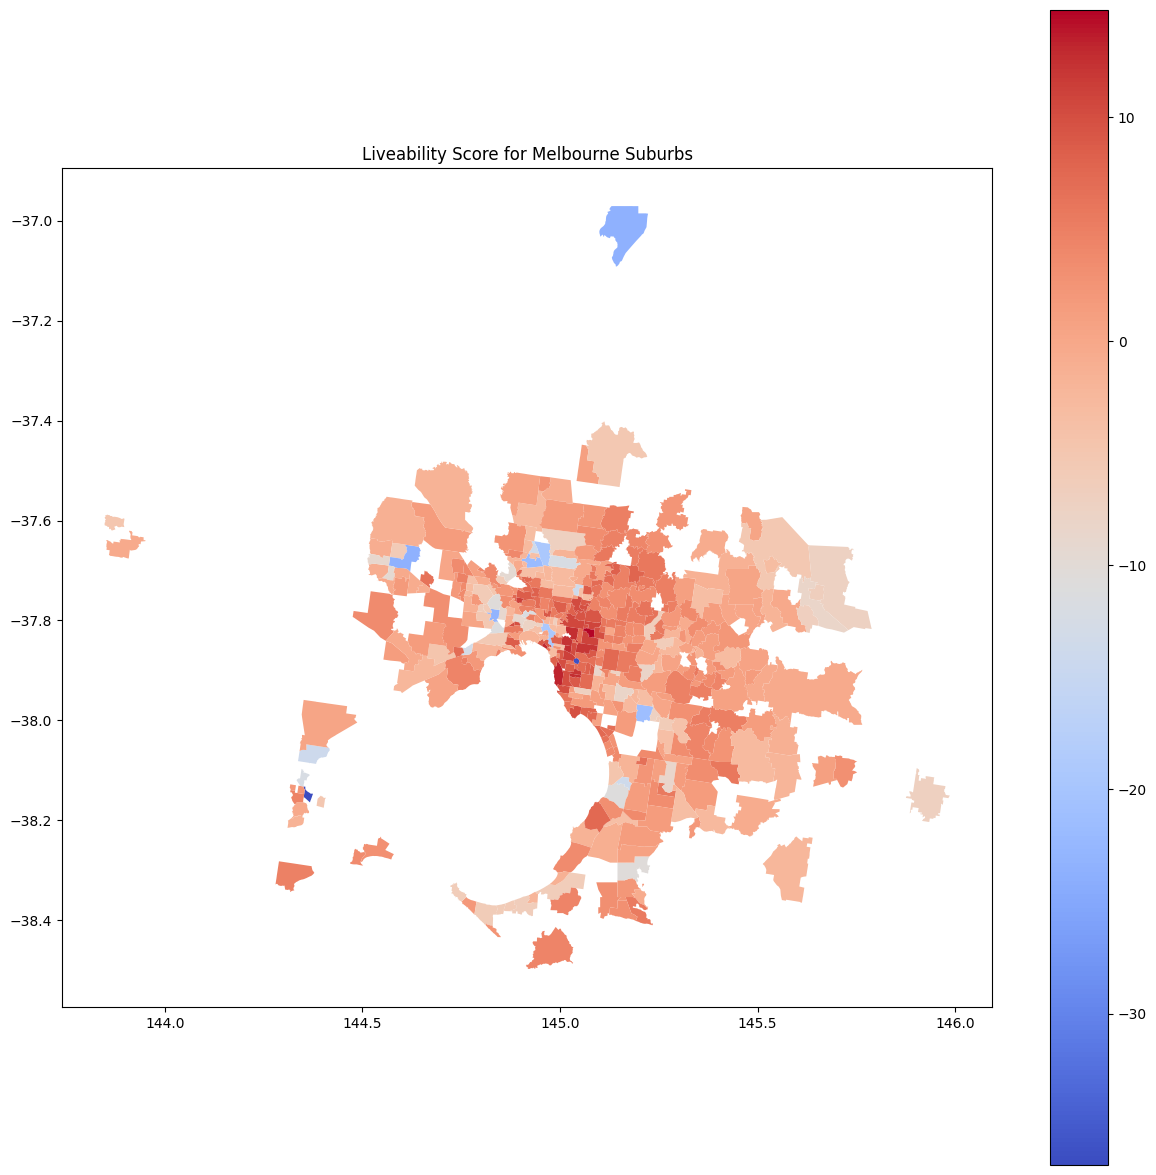

In [92]:


# graph top 10 residuals
fig, ax = plt.subplots(figsize=(15, 15))
suburbs.plot(column='liveability_score', ax=ax, legend=True, cmap='coolwarm')
plt.title('Liveability Score for Melbourne Suburbs')

# Save the plot
plt.savefig(f'../plots/liveability_score_map.png')

plt.show()

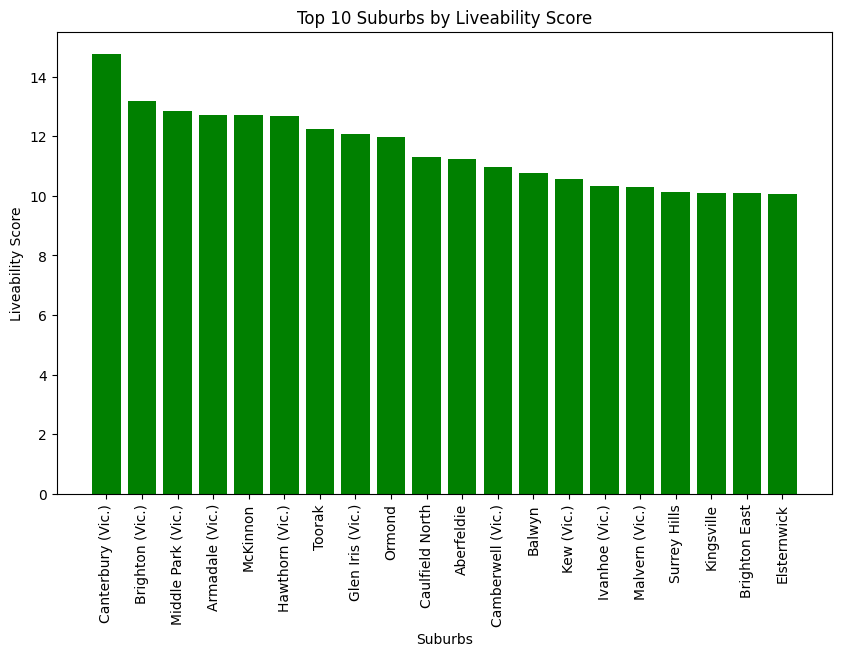

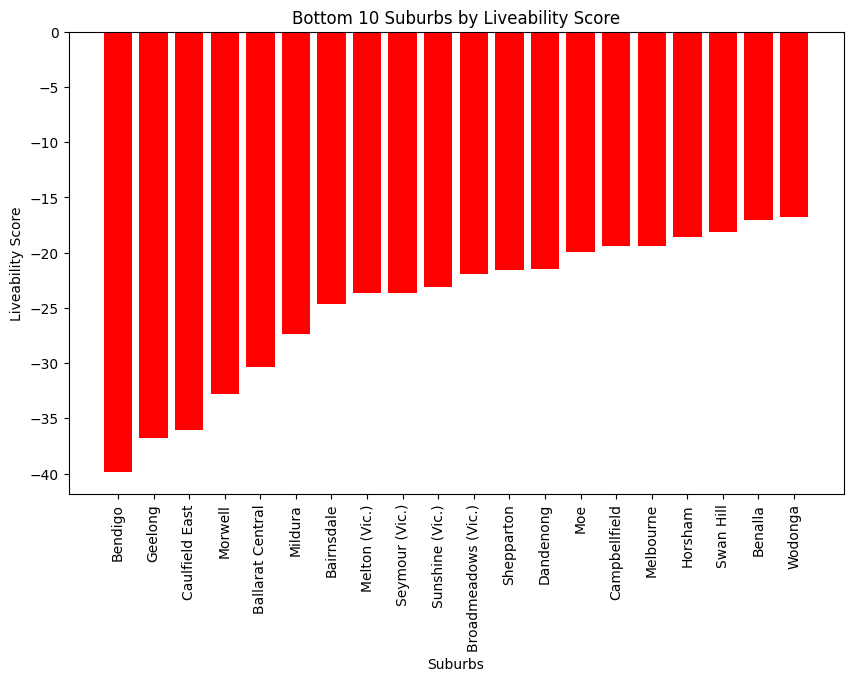

In [93]:
# Bar graph of liveability scores for top ten suburbs
plt.figure(figsize=(10, 6))
plt.bar(top_ten['SAL_NAME21'], top_ten['liveability_score'], color='green')
plt.xlabel('Suburbs')
plt.ylabel('Liveability Score')
plt.title('Top 10 Suburbs by Liveability Score')
plt.xticks(rotation=90)

plt.savefig(f'../plots/top_ten_liveability_scores_2024.png')


plt.show()

# Bar graph of liveability scores for bottom ten suburbs
plt.figure(figsize=(10, 6))
plt.bar(bottom_ten['SAL_NAME21'], bottom_ten['liveability_score'], color='red')
plt.xlabel('Suburbs')
plt.ylabel('Liveability Score')
plt.title('Bottom 10 Suburbs by Liveability Score')
plt.xticks(rotation=90)

plt.savefig(f'../plots/bottom_ten_liveability_scores.png')

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jaydenthai/Dev/University Work/2024sem2/ADS/project-2-group-real-estate-industry-project-8/plots/livability/distribution.png'

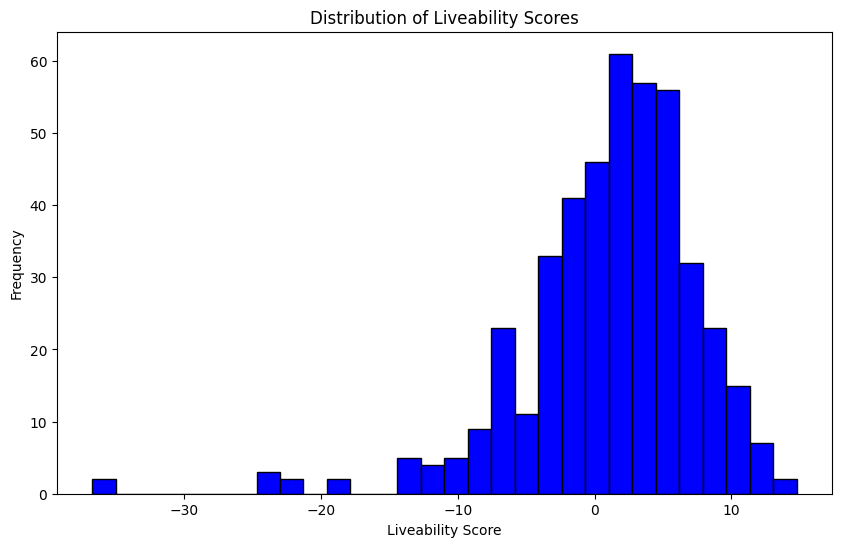

In [94]:
# look at distribution of liveability scores
plt.figure(figsize=(10, 6))
plt.hist(suburbs['liveability_score'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Liveability Score')
plt.ylabel('Frequency')
plt.title('Distribution of Liveability Scores')

plt.savefig(f'../plots/livability/distribution.png')

plt.show()

Top 10 Suburbs for 2025:
             SAL_NAME21  liveability_score
79    Canterbury (Vic.)          14.753125
60      Brighton (Vic.)          12.485004
266            McKinnon          12.322913
12      Armadale (Vic.)          12.177722
199     Hawthorn (Vic.)          12.172124
276  Middle Park (Vic.)          11.991211
420              Toorak          11.509628
181    Glen Iris (Vic.)          11.434335
77    Camberwell (Vic.)          10.973990
329              Ormond          10.881272




/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year[columns_to_standardize] = scaler.transform(data_year[columns_to_standardize])
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.dropna(axis=1, inplace=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

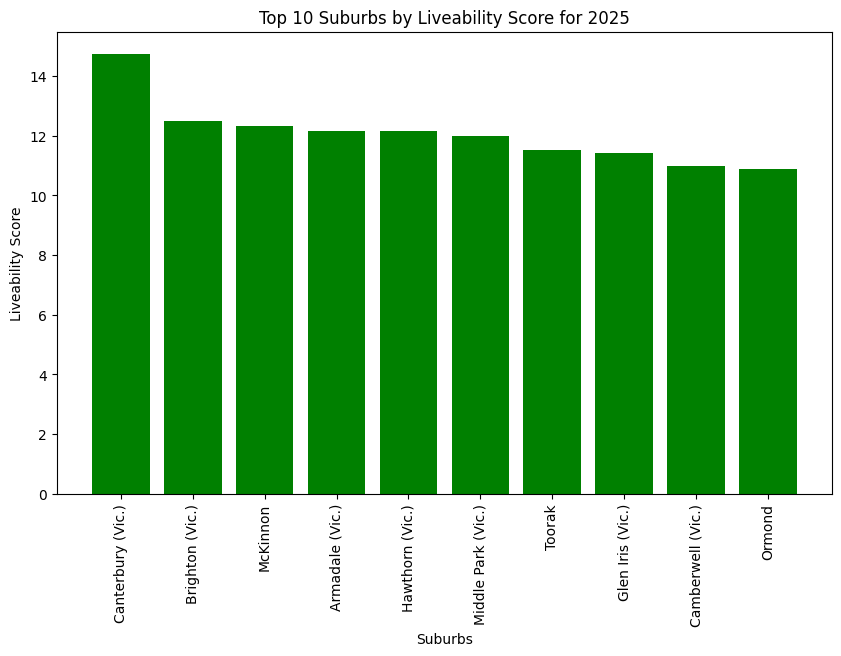

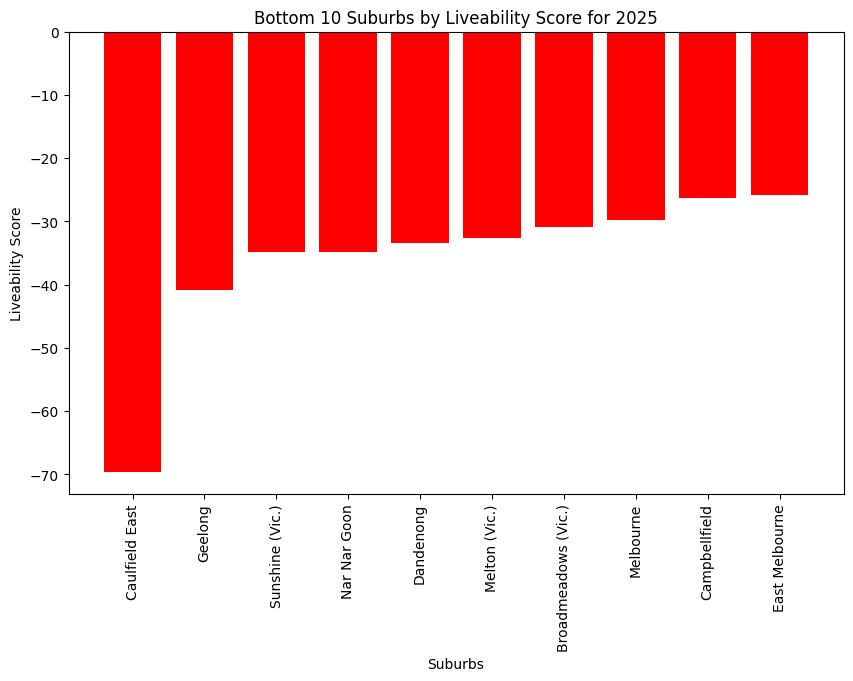

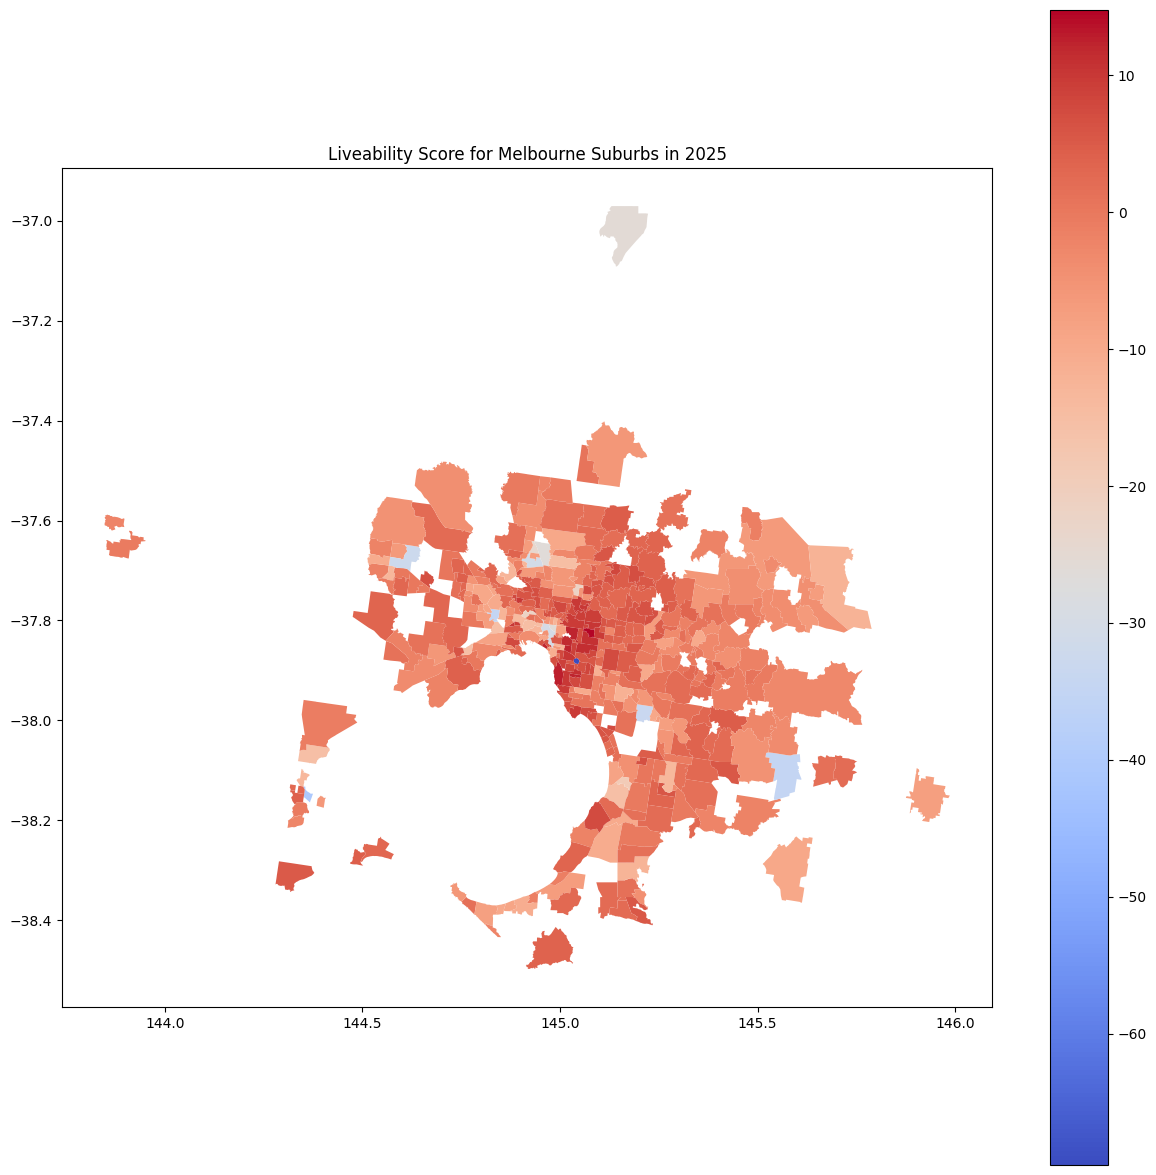

Top 10 Suburbs for 2026:
             SAL_NAME21  liveability_score
79    Canterbury (Vic.)          14.868967
266            McKinnon          12.457961
12      Armadale (Vic.)          12.423864
60      Brighton (Vic.)          12.334681
276  Middle Park (Vic.)          12.014876
199     Hawthorn (Vic.)          11.961922
181    Glen Iris (Vic.)          11.454575
420              Toorak          11.323233
329              Ormond          11.109853
77    Camberwell (Vic.)          10.685399




/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year[columns_to_standardize] = scaler.transform(data_year[columns_to_standardize])
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.dropna(axis=1, inplace=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

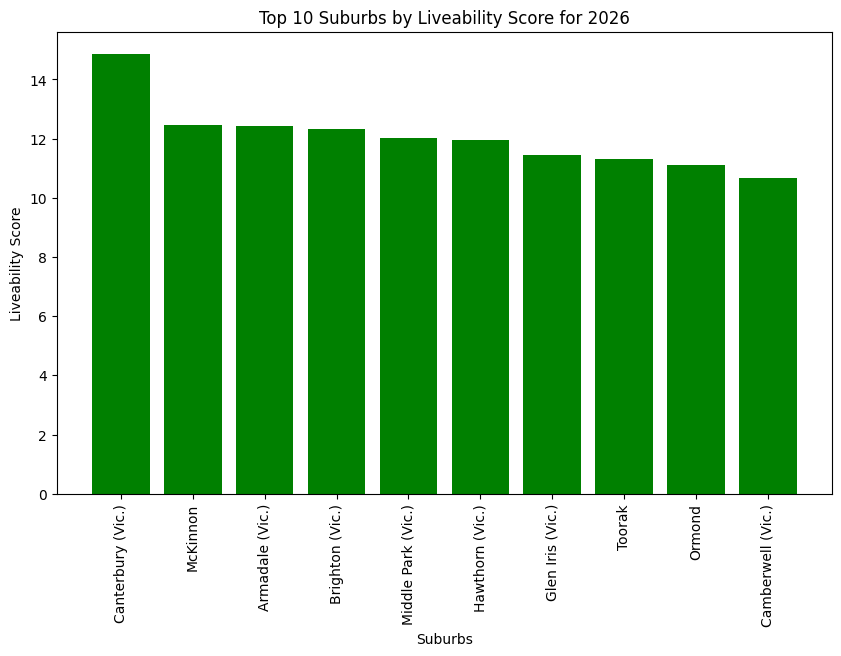

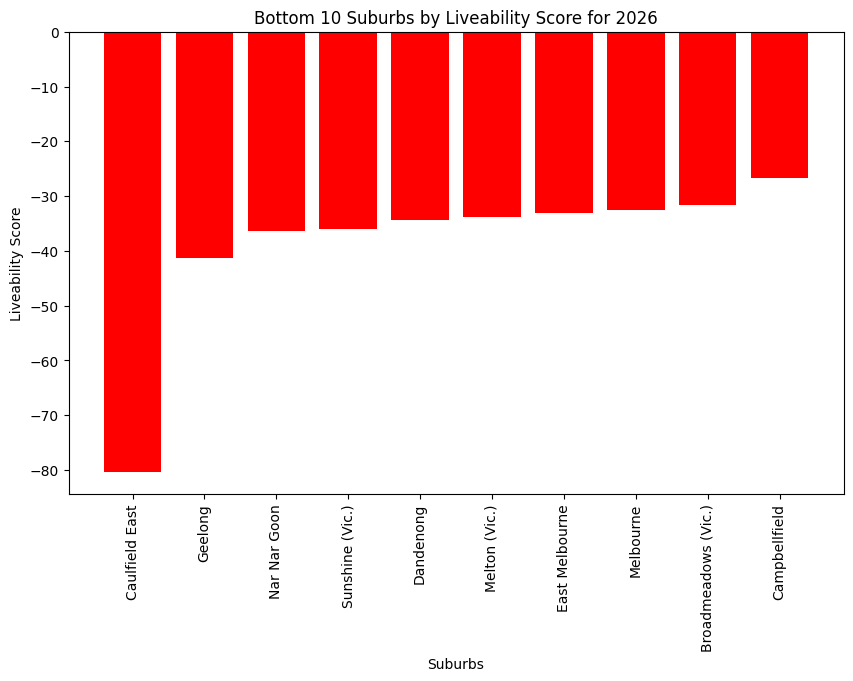

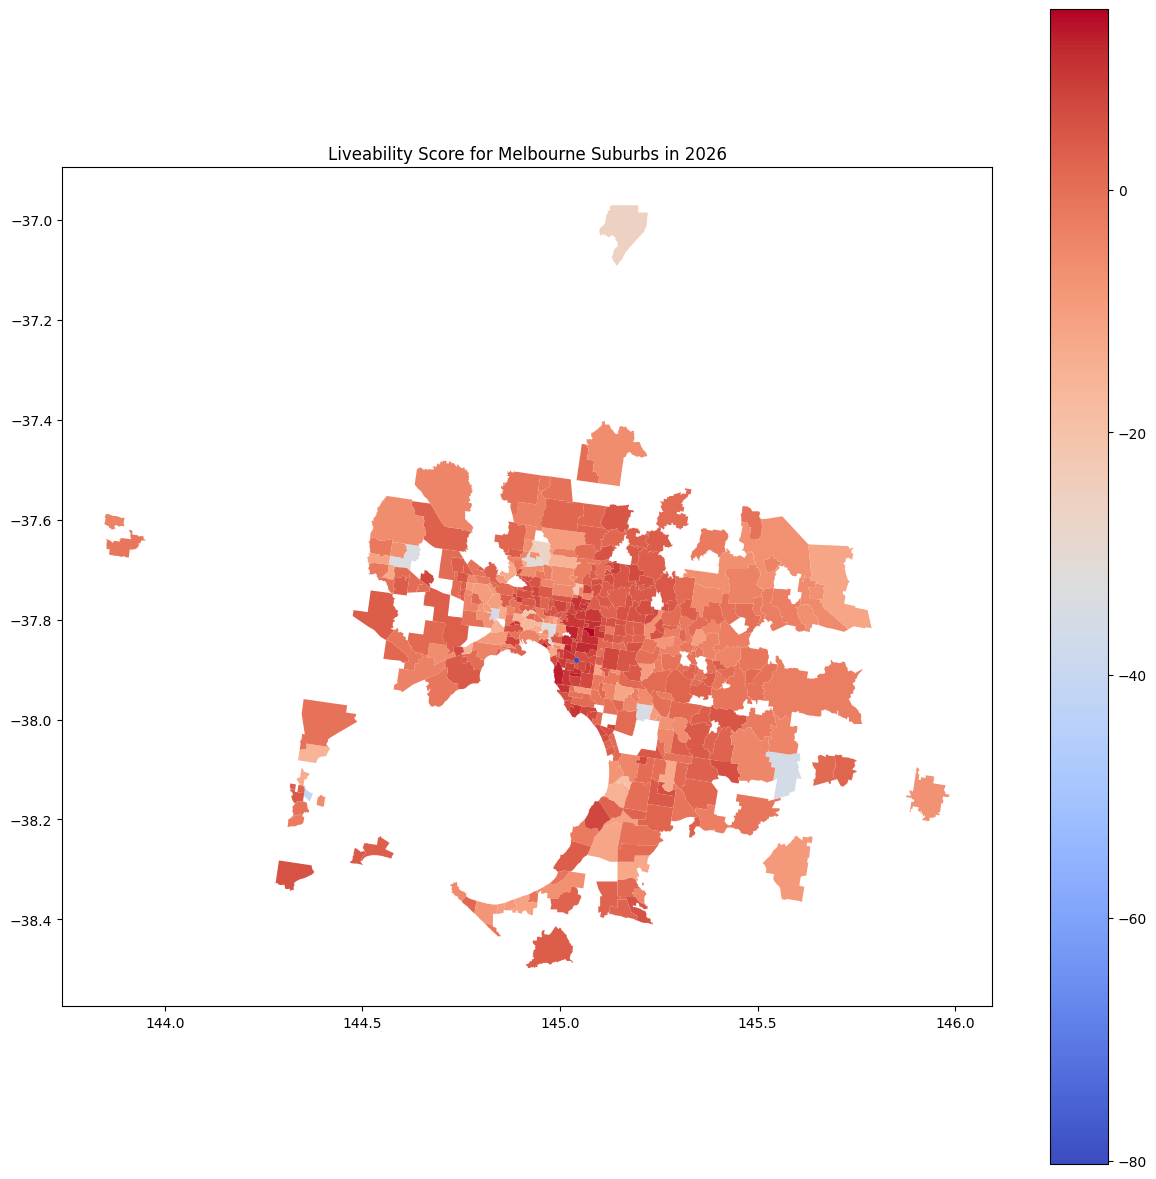

Top 10 Suburbs for 2027:
             SAL_NAME21  liveability_score
79    Canterbury (Vic.)          14.993112
266            McKinnon          12.642077
60      Brighton (Vic.)          12.326246
12      Armadale (Vic.)          12.229084
276  Middle Park (Vic.)          12.097834
199     Hawthorn (Vic.)          11.985083
181    Glen Iris (Vic.)          11.478029
420              Toorak          11.275126
329              Ormond          11.193192
77    Camberwell (Vic.)          10.912490




/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year[columns_to_standardize] = scaler.transform(data_year[columns_to_standardize])
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.dropna(axis=1, inplace=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

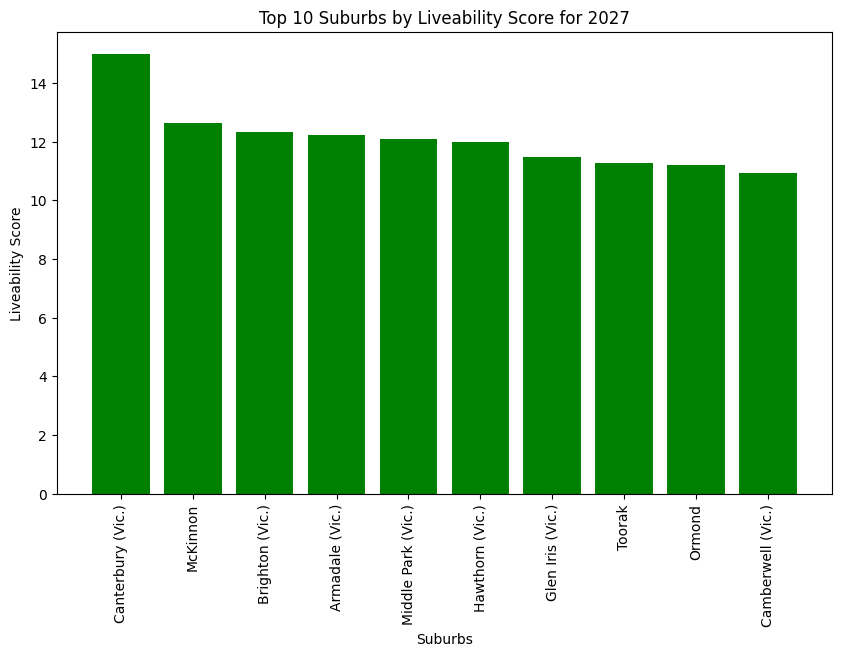

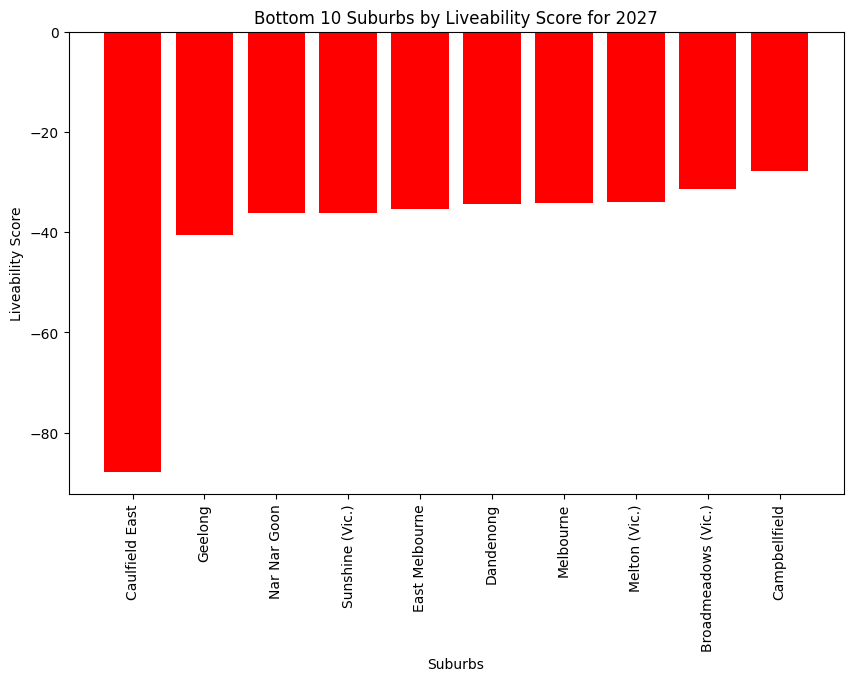

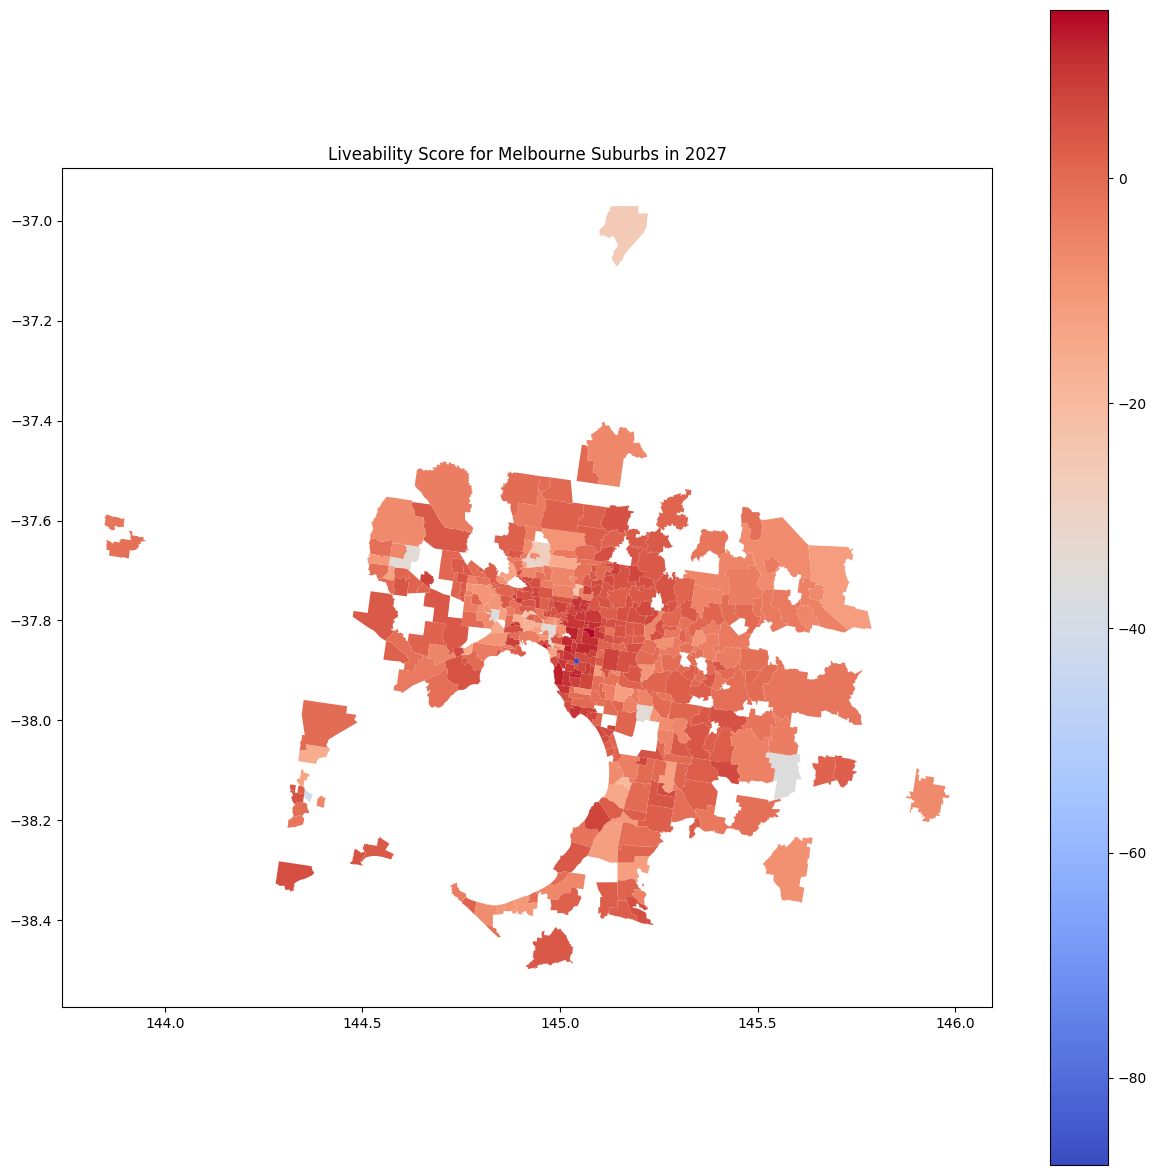

Top 10 Suburbs for 2028:
             SAL_NAME21  liveability_score
79    Canterbury (Vic.)          15.121887
266            McKinnon          12.784929
12      Armadale (Vic.)          12.491673
60      Brighton (Vic.)          12.284203
199     Hawthorn (Vic.)          11.986861
276  Middle Park (Vic.)          11.978710
181    Glen Iris (Vic.)          11.503131
329              Ormond          11.286394
420              Toorak          11.273054
77    Camberwell (Vic.)          10.686250




/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year[columns_to_standardize] = scaler.transform(data_year[columns_to_standardize])
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year.dropna(axis=1, inplace=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_91777/1543712590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

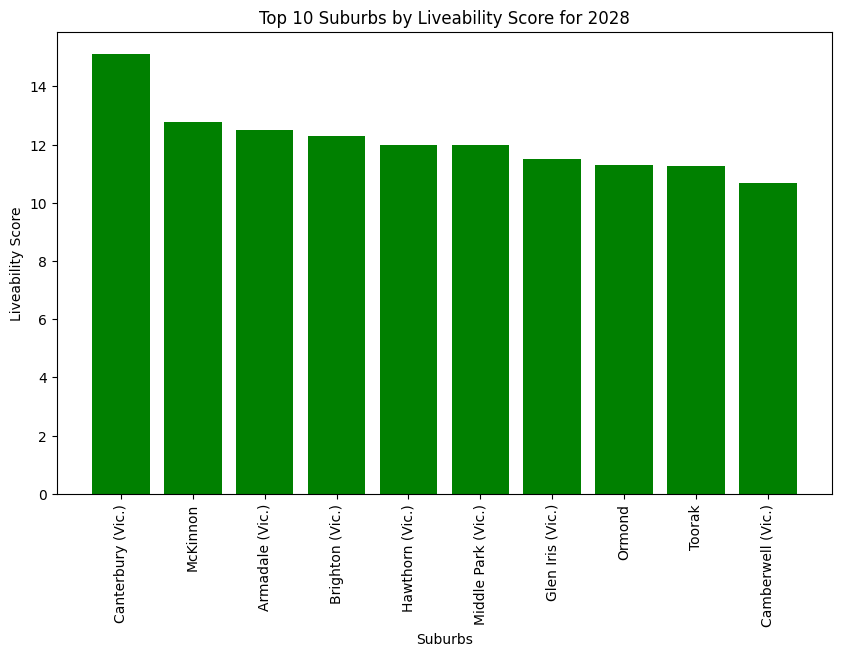

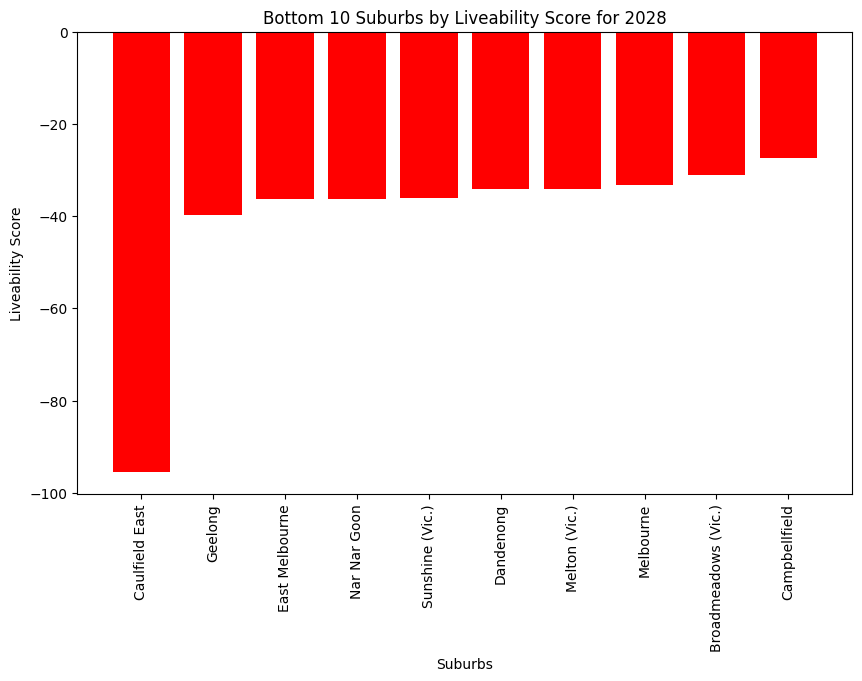

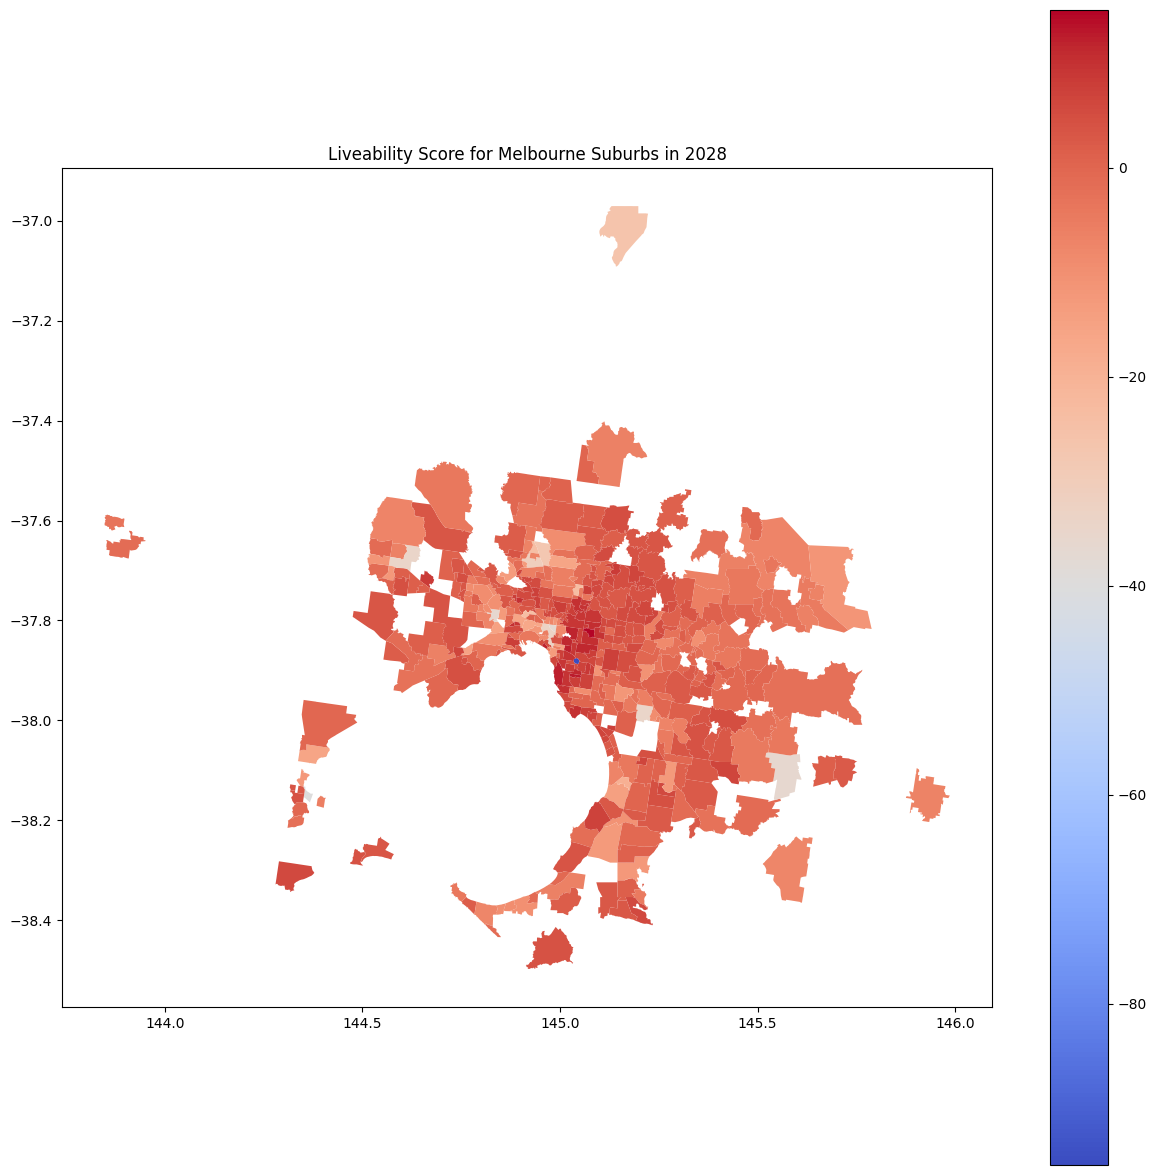

In [75]:
# Analyze top ten suburbs for the years 2025-2028
years = [2025, 2026, 2027, 2028]

for year in years:
    # Filter data for the specific year
    data_year = data[data['year'] == year]
    
    # Standardize the data
    data_year[columns_to_standardize] = scaler.transform(data_year[columns_to_standardize])

    # Remove NaN columns
    data_year.dropna(axis=1, inplace=True)
    
    # Calculate liveability score
    data_year['liveability_score'] = 0
    for var in new_coefficients_dict.keys():
        if var in data_year.columns:
            data_year['liveability_score'] += new_coefficients_dict[var] * data_year[var]
    
    # Group by suburb and calculate mean liveability score
    suburbs_year = data_year.groupby('sal_code').mean()
    suburbs_year.reset_index(inplace=True)
    
    # Merge with shapefile to get suburb names
    suburbs_year = SAL.merge(suburbs_year, left_on='SAL_CODE21', right_on='sal_code')
    
    # Compute distance to Melbourne CBD
    suburbs_year['distance_to_CBD'] = suburbs_year.apply(
        lambda row: haversine(row['geometry'].centroid.y, row['geometry'].centroid.x, melbourne_cbd_coords[0], melbourne_cbd_coords[1]), axis=1
    )
    
    # Filter out suburbs more than 100 km from Melbourne CBD
    suburbs_year = suburbs_year[suburbs_year['distance_to_CBD'] <= 100]
    
    # Get top ten suburbs by liveability score
    top_ten_year = suburbs_year.nlargest(10, 'liveability_score')
    
    # Print the top ten suburbs for the year
    print(f"Top 10 Suburbs for {year}:")
    print(top_ten_year[['SAL_NAME21', 'liveability_score']])
    print("\n")
    
    # Get bottom ten suburbs by liveability score
    bottom_ten_year = suburbs_year.nsmallest(10, 'liveability_score')
    
    # Plot bar graph for top ten suburbs
    plt.figure(figsize=(12, 8))
    plt.bar(top_ten_year['SAL_NAME21'], top_ten_year['liveability_score'], color='green')
    plt.xlabel('Suburbs')
    plt.ylabel('Liveability Score')
    plt.title(f'Top 10 Suburbs by Liveability Score for {year}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'../plots/top_ten_liveability_scores_{year}.png')
    plt.show()
    
    # Plot bar graph for bottom ten suburbs
    plt.figure(figsize=(12, 8))
    plt.bar(bottom_ten_year['SAL_NAME21'], bottom_ten_year['liveability_score'], color='red')
    plt.xlabel('Suburbs')
    plt.ylabel('Liveability Score')
    plt.title(f'Bottom 10 Suburbs by Liveability Score for {year}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'../plots/bottom_ten_liveability_scores_{year}.png')
    plt.show()
    
    # Plot map of liveability scores
    fig, ax = plt.subplots(figsize=(15, 15))
    suburbs_year.plot(column='liveability_score', ax=ax, legend=True, cmap='coolwarm')
    plt.title(f'Liveability Score for Melbourne Suburbs in {year}')
    plt.tight_layout()
    plt.savefig(f'../plots/liveability_score_map_{year}.png')
    plt.show()